<a href="https://colab.research.google.com/github/GeeK1224/cau_ml_project/blob/main/cau_ml_project_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [176]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset, Subset
import torchvision
from torchvision.transforms import transforms

In [177]:
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [5]:
!wget https://raw.githubusercontent.com/GeeK1224/cau_ml_project/main/kaggle_test_features_public.csv
!wget https://raw.githubusercontent.com/GeeK1224/cau_ml_project/main/kaggle_train_data_public.csv
!wget https://raw.githubusercontent.com/GeeK1224/cau_ml_project/main/sample_submission.csv

--2023-12-16 08:09:19--  https://raw.githubusercontent.com/GeeK1224/cau_ml_project/main/kaggle_test_features_public.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 216168 (211K) [text/plain]
Saving to: ‘kaggle_test_features_public.csv’

kaggle_test_feature 100%[===================>] 211.10K  --.-KB/s    in 0.03s   

2023-12-16 08:09:19 (7.94 MB/s) - ‘kaggle_test_features_public.csv’ saved [216168/216168]

--2023-12-16 08:09:19--  https://raw.githubusercontent.com/GeeK1224/cau_ml_project/main/kaggle_train_data_public.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request 

## ml model team ATES

In [178]:
# Data Collection
test_data = pd.read_csv("kaggle_test_features_public.csv")
train_data = pd.read_csv("kaggle_train_data_public.csv")
sample = pd.read_csv("sample_submission.csv")

In [179]:
def one_hot_encode_column(dataframe, column_name):
    """
    Perform one-hot encoding on a specific column of a DataFrame.

    Parameters:
    - dataframe: pandas DataFrame
    - column_name: str, the name of the column to one-hot encode

    Returns:
    - dataframe_encoded: pandas DataFrame, the DataFrame with the specified column one-hot encoded
    """

    # Make a copy of the DataFrame to avoid modifying the original
    dataframe_copy = dataframe.copy()

    # Perform one-hot encoding
    dataframe_encoded = pd.get_dummies(dataframe_copy, columns=[column_name], prefix=column_name)

    return dataframe_encoded

In [180]:
def zeros_and_ones(dataframe, column_name):

  # Make a copy of the DataFrame to avoid modifying the original
  dataframe_copy = dataframe.copy()

  # Perform turning values to zeros and ones
  dataframe_copy[column_name].replace('Yes', 1, inplace=True)
  dataframe_copy[column_name].replace('No', 0, inplace=True)

  return dataframe_copy

In [181]:
# Feature engineering Test Data
drop_columns = ["CustomerID", "Count", "Country", "State", "City", "Zip Code", "Lat Long", "Latitude", "Longitude"]
category_yes_no = ['Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Paperless Billing']
categories_many = ['Gender', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Payment Method']

test_data = test_data.copy()
for category in category_yes_no:
  test_data = zeros_and_ones(test_data, category)


for category in categories_many:
  test_data = one_hot_encode_column(test_data, category)

encode_test = test_data.drop(drop_columns, axis=1)
encode_test


,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Paperless Billing,Monthly Charges,Gender_Female,Gender_Male,Multiple Lines_No,...,Streaming Movies_No,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,0,1,0,51,0,1,30.05,0,1,0,...,1,0,0,1,0,0,0,1,0,0
1,0,1,0,49,1,1,99.05,0,1,0,...,0,0,1,1,0,0,1,0,0,0
2,0,0,0,60,1,1,116.60,0,1,0,...,0,0,1,0,1,0,0,1,0,0
3,0,1,0,45,1,1,54.15,1,0,1,...,1,0,0,0,1,0,0,1,0,0
4,0,1,1,31,1,0,25.75,0,1,0,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,0,1,0,34,1,0,62.65,1,0,0,...,1,0,0,1,0,0,0,0,1,0
982,0,0,1,9,1,0,55.35,0,1,1,...,1,0,0,1,0,0,0,0,1,0
983,1,1,0,23,1,1,95.10,1,0,1,...,0,0,1,1,0,0,0,0,1,0
984,0,0,0,21,1,1,99.15,1,0,1,...,0,0,1,1,0,0,1,0,0,0


In [182]:
# Feature engineering Train Data
drop_columns = ["CustomerID", "Count", "Country", "State", "City", "Zip Code", "Lat Long", "Latitude", "Longitude"]
category_yes_no = ['Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Paperless Billing']
categories_many = ['Gender', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Payment Method']

train_data = train_data.copy()
for category in category_yes_no:
  train_data = zeros_and_ones(train_data, category)


for category in categories_many:
  train_data = one_hot_encode_column(train_data, category)

encode_train = train_data.drop(drop_columns, axis=1)
encode_train

,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Paperless Billing,Monthly Charges,Churn Score,Churn Value,CLTV,...,Streaming Movies_No,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,0,0,1,21,1,0,80.35,62,0,4579,...,1,0,0,1,0,0,0,0,1,0
1,0,0,1,9,1,0,93.00,40,0,2267,...,0,0,1,1,0,0,1,0,0,0
2,0,1,0,69,1,1,106.40,26,0,4328,...,0,0,1,0,1,0,0,1,0,0
3,0,0,0,9,1,1,75.85,70,0,5212,...,1,0,0,1,0,0,0,0,1,0
4,0,1,0,5,1,0,20.10,42,0,2894,...,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3939,0,0,0,3,1,0,55.35,65,1,5787,...,1,0,0,1,0,0,0,0,1,0
3940,0,1,0,24,1,1,93.00,29,0,5886,...,0,0,1,1,0,0,0,0,1,0
3941,0,0,0,1,1,1,45.70,95,1,2295,...,1,0,0,1,0,0,0,0,0,1
3942,1,1,0,47,1,1,67.45,67,0,4074,...,1,0,0,1,0,0,0,1,0,0


In [183]:
# deviding data to X and y
# Попробуйте с CLTV и без
targets = ['Churn Score', 'Churn Value' ,'CLTV', 'Churn Reason']

X = encode_train.drop(targets, axis=1)
y = encode_train['Churn Value']

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# SMOTE

In [185]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [186]:
from imblearn.over_sampling import SMOTE

In [187]:
print("Class distribution before SMOTE:")
print(y_train.value_counts())

print("\nClass distribution after SMOTE:")
print(y_train_resampled.value_counts())

Class distribution before SMOTE:
0    2038
1     722
Name: Churn Value, dtype: int64

Class distribution after SMOTE:
0    2038
1    2038
Name: Churn Value, dtype: int64


# XGBoost

In [188]:
from xgboost import XGBClassifier

In [189]:
# Create an XGBoost classifier
model = XGBClassifier()

# Fit the model on the resampled training data
model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [220]:
probabilities = model.predict_proba(encode_test)[:, 1]

In [221]:
data_id_pred = {'ID': range(986), 'Churn Value': probabilities}

pred_data_csv = pd.DataFrame(data=data_id_pred)

compression_opts1 = dict(method='zip', archive_name='pred.csv')
pred_data_csv.to_csv('pred.zip', index=False, compression=compression_opts1)

# AUC ROC

Accuracy: 0.7863
Precision: 0.6174
Recall: 0.5697
F1 Score: 0.5926
AUC-ROC: 0.8265


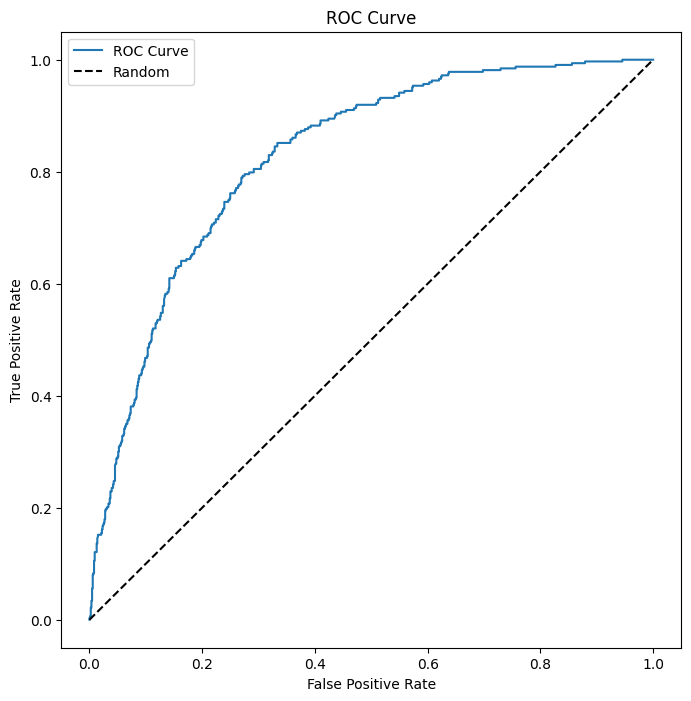

In [190]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

# Display evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'AUC-ROC: {roc_auc:.4f}')

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Random Forest

In [83]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier()

In [84]:
X_resampled_combined = np.concatenate((X_train_resampled, X_test), axis=0)
y_resampled_combined = np.concatenate((y_train_resampled, y_test), axis=0)

# Perform k-fold cross-validation (let's say k=5)
k = 5
cv_scores = cross_val_score(model, X_resampled_combined, y_resampled_combined, cv=k, scoring='accuracy')

# Display cross-validation scores
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean Accuracy: {np.mean(cv_scores):.4f}')

Cross-Validation Scores: [0.80323194 0.84220532 0.90019011 0.90019011 0.77281369]
Mean Accuracy: 0.8437


Accuracy: 0.7855
Precision: 0.6353
Recall: 0.5015
F1 Score: 0.5606
AUC-ROC: 0.8117


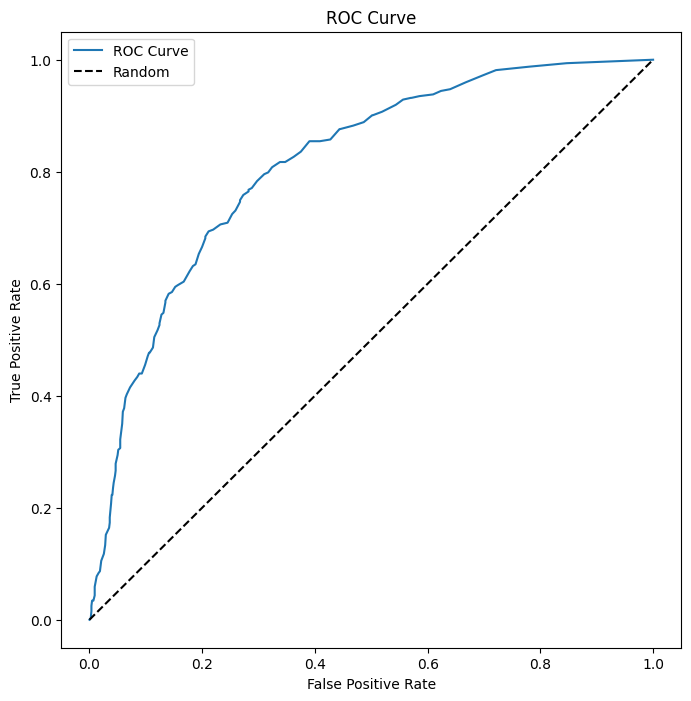

In [85]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

# Display evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'AUC-ROC: {roc_auc:.4f}')

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Logistic Regression

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [121]:
model = LogisticRegression()
model = model.fit(X_train, y_train)

In [122]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       861
           1       0.64      0.50      0.56       323

    accuracy                           0.79      1184
   macro avg       0.73      0.70      0.71      1184
weighted avg       0.77      0.79      0.78      1184



Accuracy: 0.7855
Precision: 0.6353
Recall: 0.5015
F1 Score: 0.5606
AUC-ROC: 0.8312


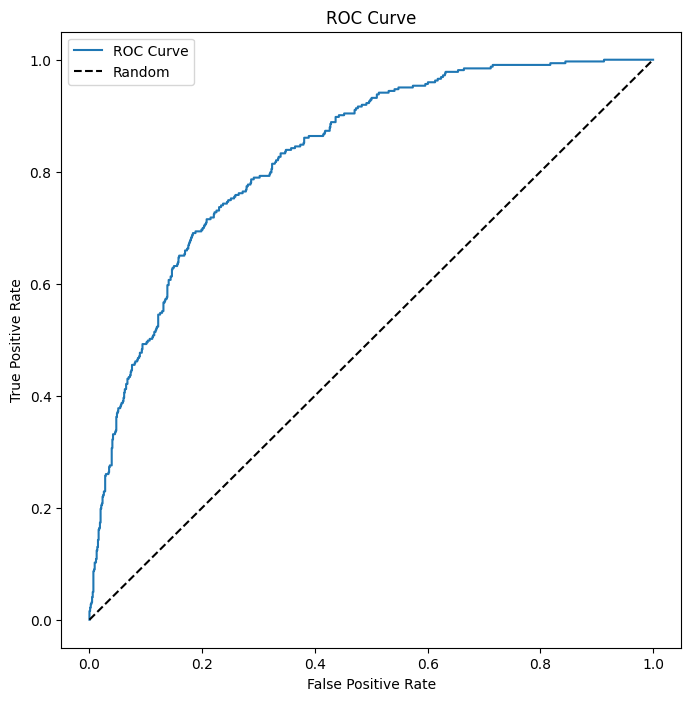

In [123]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

# Display evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'AUC-ROC: {roc_auc:.4f}')

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
model.predict()

# Neural Network

In [ ]:
# Надо выбрать правильные activation functions

class NN(nn.Models):
  def __init__(self):
    super(NN, self).__init__()
    self.nn_layer1 = nn.Linear(, hidden_size)
    self.nn_layer2 = nn.ReLU()
    # choose quant of hidden layers and quant of nodes inside them

  def forward(self, x):
    x = self.nn_layer1(x)
    x = self.nn_layer2(x)
    return x

In [ ]:
# create network again just in case
model = nn.Sequential(
    nn.Linear(784, 500),
    nn.ReLU(),
    nn.Linear(500, 200),
    nn.ReLU(),
    nn.Linear(200, 10),
    nn.Sigmoid(),
)
model.to(device, torch.float32)

opt = torch.optim.Adam(model.parameters(), lr=1e-3)

In [ ]:
n_epochs = 30

train_loss, val_loss, val_accuracy = train_model(model, train_loader, val_loader, loss_func, opt, n_epochs)

In [ ]:
plot_train_process(train_loss, val_loss, val_accuracy)

In [ ]:
trans = transforms.Compose([transforms.ToTensor()])

In [ ]:
# CUDA

learning_rate = 0.001
num_epochs = 5

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = NN()
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
# Moddel Training

# Видео Ютуб

# NN

# initialize bias - посмотри как лучше начинать с нуля или с рандома

# SOFTPLUS | SIGMOID | ReLU | ARGMAX |

# GRADIENT BOOSTING

# DROPOUT

# Cross Entropy of 1 class = - log(output)
# Cross Entropy of 2 class = - log(output)
# Cross Entropy sum = class1 + class2
# backpropagation


# KFOLD

# BACKPROPAGATION
# MSE for squared residuals - sum of squared residuals end up being a curve
# then using Gradient Descent we finding optimal value for biased term

# SOFTMAX - for training, ARGMAX - for result


In [ ]:
# Model Evaluation
# AUC ROC

In [ ]:
# testing on test data

In [ ]:
# result